In [1]:
import pandas as pd # For reading and working with data frames
import numpy as np # Gives access to math tools and arrays
import seaborn as sns # For charts
import matplotlib.pyplot as plt # For graphs

from sklearn.linear_model import LinearRegression # For building a linear model
from sklearn.tree import DecisionTreeRegressor # For building a decision tree model
from sklearn.model_selection import train_test_split # To split data into training and testing
from sklearn.metrics import r2_score, mean_squared_error # To evaluate how well our model performs
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier



# Task 1: Model 1 | Regression

In [2]:
df_task1 = pd.read_csv("student-mat_.csv") # Just reads the data file

df_task1.info() # Show us a sumamry of how many rows, column names, types, and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         390 non-null    object 
 2   age         393 non-null    float64
 3   address     392 non-null    object 
 4   famsize     395 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        395 non-null    int64  
 7   Fedu        395 non-null    int64  
 8   Mjob        395 non-null    object 
 9   Fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    395 non-null    object 
 12  traveltime  395 non-null    int64  
 13  studytime   395 non-null    int64  
 14  failures    395 non-null    int64  
 15  schoolsup   395 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        395 non-null    object 
 18  activities  395 non-null    object 
 19  nursery     395 non-null    o

In [3]:
df_task1.describe() #  This give us the basic stats, such as the mean, std, min, and max

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
count,393.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,394.000000,395.000000,395.000000,395.000000,395.000000,394.000000,392.000000
mean,16.816794,2.989873,2.521519,1.448101,4.562025,0.083544,3.944304,3.327411,3.108861,1.481013,2.291139,3.554430,7.751269,10.415816
std,4.071055,4.964841,1.088201,0.697505,50.169591,5.053079,0.896659,2.059400,1.113278,0.890741,1.287897,1.390303,46.013706,4.585427
min,0.000000,0.000000,0.000000,1.000000,1.000000,-99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-88.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,14.000000
max,90.000000,99.000000,4.000000,4.000000,999.000000,3.000000,5.000000,39.000000,5.000000,5.000000,5.000000,5.000000,900.000000,20.000000


In [4]:
df_task1 = df_task1.dropna(subset=['G3']) # Here I'll be dropping the columns where the grades aren't showing

df_task1 = df_task1[df_task1['studytime'] < 10] # Filtering out the unrealistic study time hours that drastically exceeed the 4 levels of study times that we have
df_task1 = df_task1[df_task1['failures'] >= 0] # The amount of failures is a negative value which doesn't make sense, so I only took into acccount whatever is 0 and above
df_task1 = df_task1[df_task1['absences'] < 100]# unrealistic or uncommon absences
df_task1 = df_task1[df_task1['age'] < 25]# unrealistic or uncommon ages

df_task1['sex'].fillna(df_task1['sex'].mode()[0], inplace=True)  # Replace missing gender with the most common value
df_task1['address'].fillna(df_task1['address'].mode()[0], inplace=True)  # Same for address
df_task1['freetime'].fillna(df_task1['freetime'].median(), inplace=True)  # Use median for free time since it's numeric
df_task1['absences'].fillna(df_task1['absences'].median(), inplace=True)  # Fill missing absences with typical value



<ipython-input-4-843fc15a28f4>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_task1['sex'].fillna(df_task1['sex'].mode()[0], inplace=True)  # Replace missing gender with the most common value
<ipython-input-4-843fc15a28f4>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

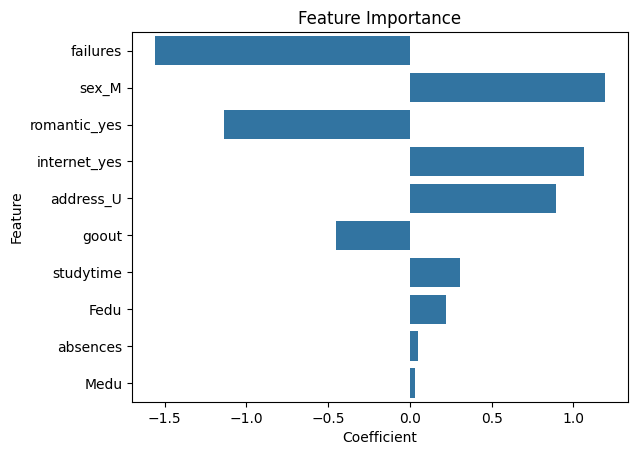

In [5]:
# Turn text into Binary, so that the model can understand
categorical_cols = df_task1.select_dtypes(include='object').columns  # Get all text columns
df_encoded = pd.get_dummies(df_task1, columns=categorical_cols, drop_first=True)  # Turn categories into 0/1 values

# Select the features for Modeling
features = [
    'studytime', 'failures', 'absences', 'Medu', 'Fedu', 'goout',
    'sex_M', 'address_U', 'internet_yes', 'romantic_yes'
]
X1 = df_encoded[features]  # Predictor variables
y1 = df_encoded['G3']  # The target variable or final grade

# Split Data into Training and Testing Sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X1_train, y1_train)  # Fit model using training data

# Make Predictions with the Linear Regression
y1_pred_lr = lr_model.predict(X1_test)  # Predict final grades

# Evaluate Linear Regression Model
lr_r2_task1 = r2_score(y1_test, y1_pred_lr)
lr_mse_task1 = mean_squared_error(y1_test, y1_pred_lr)
lr_coefficients_task1 = pd.DataFrame({
    'Feature': X1.columns,
    'Coefficient': lr_model.coef_
})

coeff_df = pd.DataFrame({
    "Feature": X1.columns,
    "Coefficient": lr_model.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)
sns.barplot(data=coeff_df, y="Feature", x="Coefficient")
plt.title("Feature Importance")
plt.show()


Linear Regression Results
Intercept: 9.031339381677615
        Feature  Coefficient
0     studytime     0.307647
1      failures    -1.561818
2      absences     0.050144
3          Medu     0.031906
4          Fedu     0.218752
5         goout    -0.453993
6         sex_M     1.196771
7     address_U     0.895040
8  internet_yes     1.064363
9  romantic_yes    -1.135423
R2 Score: 0.33420446384561453
MSE: 14.824927490644233


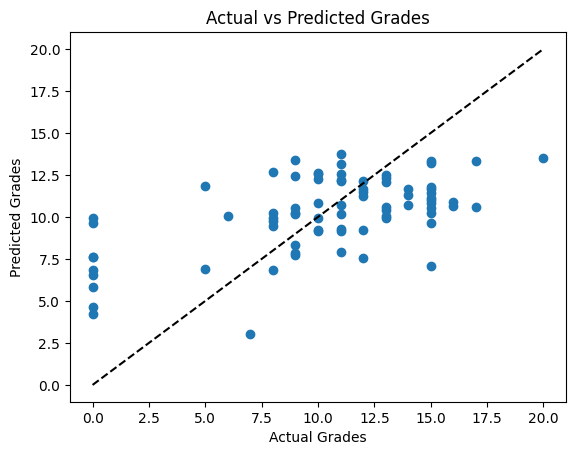

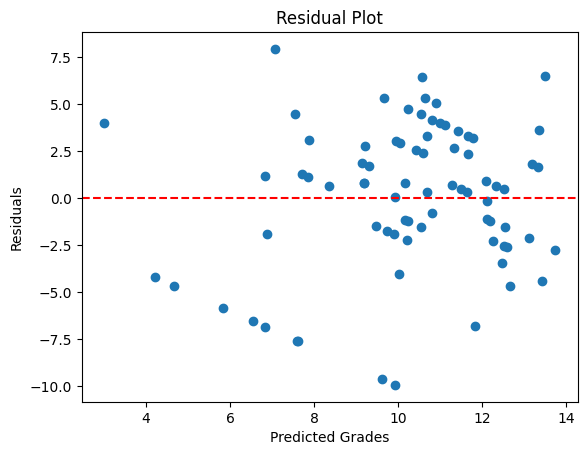

In [ ]:
#printing the results of the Linear Regression model such as the R2 score and MSE
print("\nLinear Regression Results")
print("Intercept:", lr_model.intercept_)
print(lr_coefficients_task1)
print("R2 Score:", lr_r2_task1)
print("MSE:", lr_mse_task1)

# Actual vs Predicted Grades
plt.scatter(y1_test, y1_pred_lr)
plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], 'k--')
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.title("Actual vs Predicted Grades")
plt.show()


# Residual Plot
residuals = y1_test - y1_pred_lr
plt.scatter(y1_pred_lr, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Grades")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

#Task 1: Model 2 | Decision Trees


Decision Tree Regression Results
R2 Score: 0.3536224678972244
MSE: 14.392556760523567


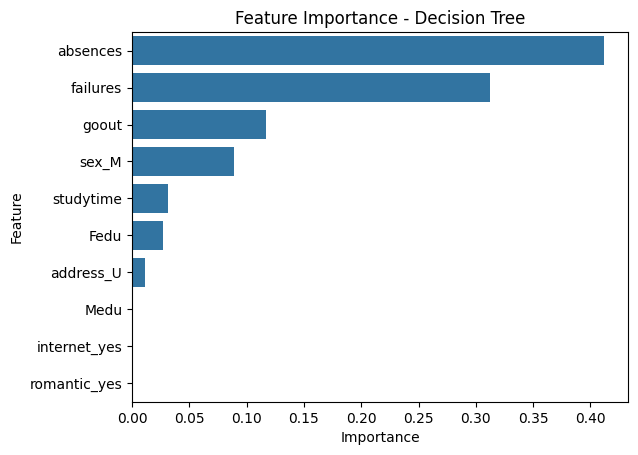

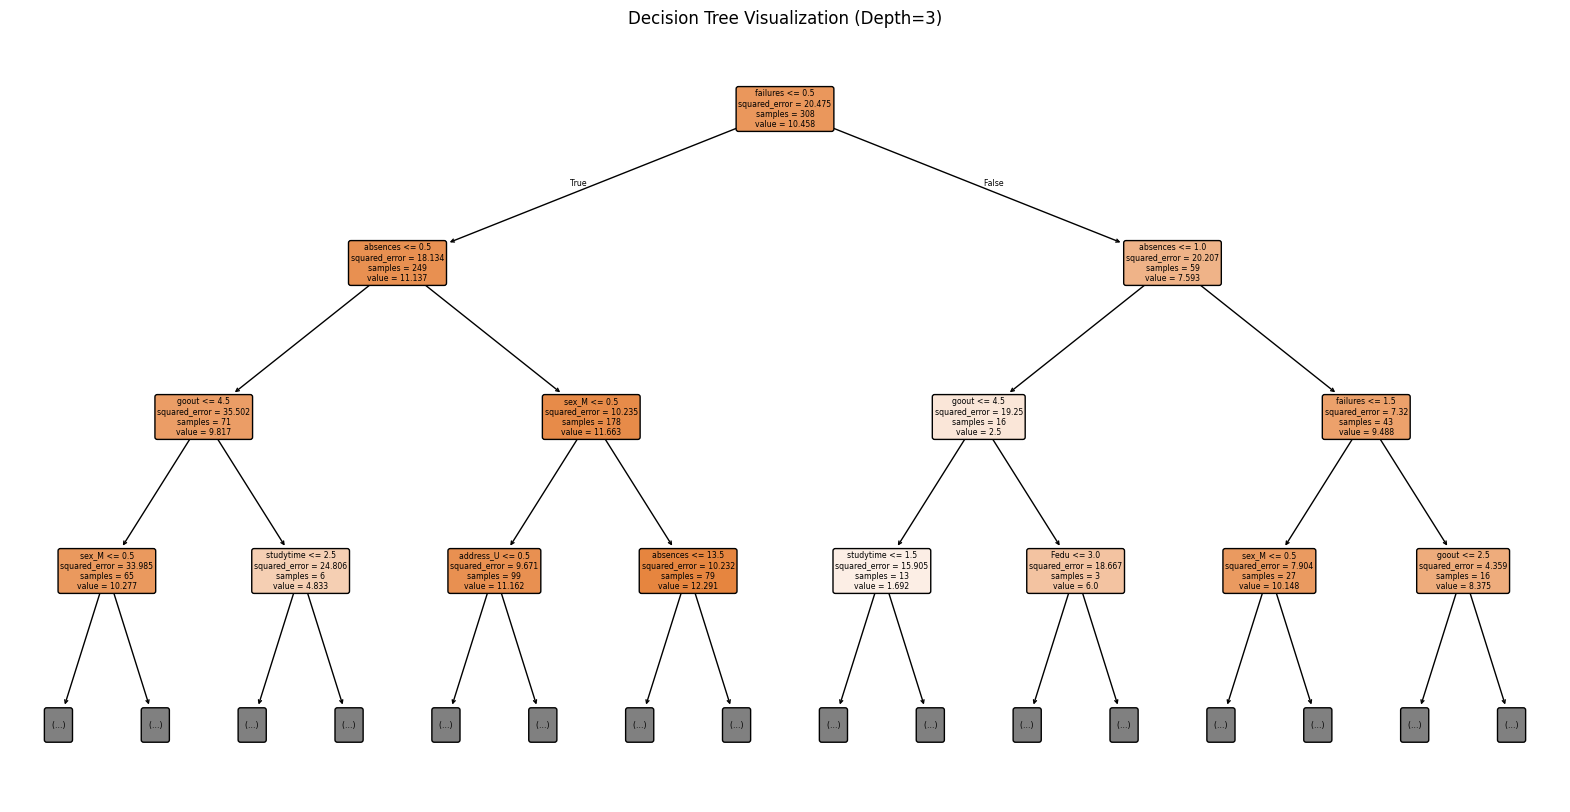

In [6]:
#Train the Decision Tree Regression Model
dt_model = DecisionTreeRegressor(max_depth=4, random_state=42)
dt_model.fit(X1_train, y1_train)  # Fit the decision tree to the training data

# I used the Decision Tree to make a prediction on the Test Data
y1_pred_dt = dt_model.predict(X1_test)

# Evaluating the Decision Tree Model
dt_r2_task1 = r2_score(y1_test, y1_pred_dt)
dt_mse_task1 = mean_squared_error(y1_test, y1_pred_dt)

# Same thing for the Decision Tree regression
print("\nDecision Tree Regression Results")
print("R2 Score:", dt_r2_task1)
print("MSE:", dt_mse_task1)

dt_feature_importance = pd.DataFrame({
    'Feature': X1.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

sns.barplot(data=dt_feature_importance, x='Importance', y='Feature')
plt.title("Feature Importance - Decision Tree")
plt.show()

#Decision Tree Structure
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X1.columns, filled=True, rounded=True, max_depth=3)
plt.title("Decision Tree Visualization (Depth=3)")
plt.show()


## Task 2: Classification

In [7]:
df_task2 =  pd.read_csv("obesity_prediction.csv")
df_task2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112 entries, 0 to 2111
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2112 non-null   object 
 1   Age             2112 non-null   float64
 2   Height          2112 non-null   float64
 3   Weight          2112 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2112 non-null   float64
 7   NCP             2112 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2112 non-null   object 
 12  FAF             2112 non-null   float64
 13  TUE             2112 non-null   float64
 14  CALC            2112 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2112 non-null   object 
dtypes: float64(8), object(9)
memory u

In [8]:
df_task2.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [9]:
target_encoder = LabelEncoder()
df_task2['Obesity'] = target_encoder.fit_transform(df_task2['Obesity'])

# Encode Categorical Features
df_task2_encoded = pd.get_dummies(df_task2, drop_first=True)
df_task2_encoded = df_task2_encoded.dropna()  # Drop any remaining NaNs after encoding

# Define the features and target
X2 = df_task2_encoded.drop('Obesity', axis=1)
y2 = df_task2_encoded['Obesity']

# Split Data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Scale Features
scaler_task2 = StandardScaler()
X2_train_scaled = scaler_task2.fit_transform(X2_train)
X2_test_scaled = scaler_task2.transform(X2_test)


#Task 2: Model 1 | Logistic Regression


Logistic Regression Results
Accuracy: 0.6004728132387707
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.64      0.59        59
           1       0.41      0.32      0.36        57
           2       0.64      0.62      0.63        74
           3       0.57      0.90      0.69        58
           4       0.91      1.00      0.95        63
           5       0.49      0.35      0.41        57
           6       0.49      0.31      0.38        55

    accuracy                           0.60       423
   macro avg       0.58      0.59      0.57       423
weighted avg       0.58      0.60      0.58       423

Confusion Matrix:
 [[38 11  0  0  0  9  1]
 [19 18  2  3  0 11  4]
 [ 4  2 46 12  3  0  7]
 [ 0  0  5 52  0  0  1]
 [ 0  0  0  0 63  0  0]
 [ 7  9  6  7  3 20  5]
 [ 2  4 13 18  0  1 17]]


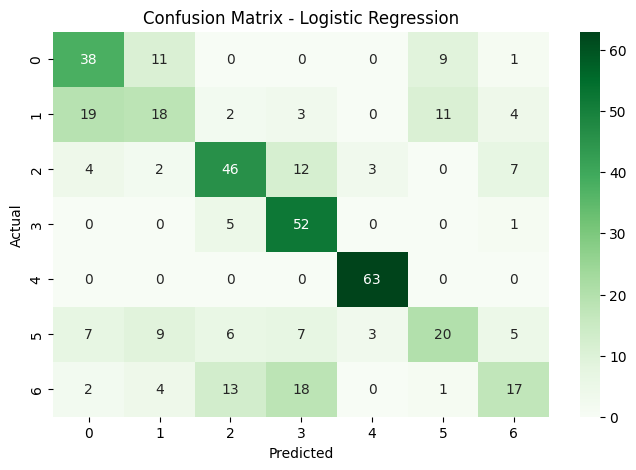

In [11]:
# Logistic Regression Model
log_model_task2 = LogisticRegression(max_iter=1000)
log_model_task2.fit(X2_train_scaled, y2_train)
y2_pred_log = log_model_task2.predict(X2_test_scaled)

# Evaluating the Logistic Regression
print("\nLogistic Regression Results")
print("Accuracy:", accuracy_score(y2_test, y2_pred_log))
print("Classification Report:\n", classification_report(y2_test, y2_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y2_test, y2_pred_log))

# Confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y2_test, y2_pred_log), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Task 2 : Model 2 | KNN


K-Nearest Neighbors Results
Accuracy: 0.7754137115839244
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.88      0.78        59
           1       0.54      0.51      0.52        57
           2       0.82      0.81      0.82        74
           3       0.77      0.91      0.83        58
           4       0.98      1.00      0.99        63
           5       0.81      0.61      0.70        57
           6       0.78      0.65      0.71        55

    accuracy                           0.78       423
   macro avg       0.77      0.77      0.77       423
weighted avg       0.78      0.78      0.77       423

Confusion Matrix:
 [[52  5  0  0  0  2  0]
 [14 29  7  3  0  3  1]
 [ 1  4 60  3  1  0  5]
 [ 0  1  1 53  0  1  2]
 [ 0  0  0  0 63  0  0]
 [ 4 10  4  2  0 35  2]
 [ 3  5  1  8  0  2 36]]


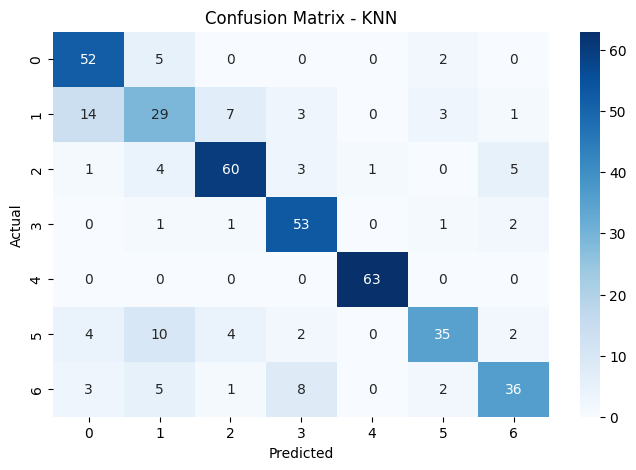

In [12]:
# KNN Model
knn_model_task2 = KNeighborsClassifier(n_neighbors=5)
knn_model_task2.fit(X2_train_scaled, y2_train)
y2_pred_knn = knn_model_task2.predict(X2_test_scaled)

# Evaluating the KNN
print("\nK-Nearest Neighbors Results")
print("Accuracy:", accuracy_score(y2_test, y2_pred_knn))
print("Classification Report:\n", classification_report(y2_test, y2_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y2_test, y2_pred_knn))

# confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y2_test, y2_pred_knn), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
